## 사용자 행동 인식 데이터셋

- 손목 스마트폰 센서를 통해 수집된 일상의 동작 데이터를 통해 6가지 Activity로 예측

- [캐글](https://www.kaggle.com)의 [Human Activity Recognition with Smartphones](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 `human_activity_train.csv`와 `human_activity_train.csv`로 datasets 디렉토리에 저장

### 1. 데이터 탐색

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
train = pd.read_csv('./human_activity_train.csv')
test = pd.read_csv('./human_activity_test.csv')

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
train.shape

(7352, 563)

In [9]:
test.shape

(2947, 563)

In [10]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [13]:
train.isnull().sum().sum()

0

In [14]:
test.isnull().sum().sum()

0

In [16]:
train["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [17]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

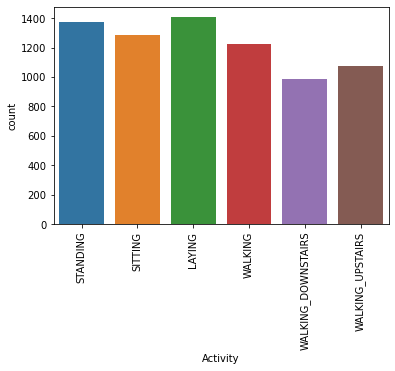

In [19]:
sns.countplot(x = train["Activity"])
plt.xticks(rotation=90)

In [20]:
train['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [28]:
label_encoder = OrdinalEncoder()
#LabelEncoder() 이것을 쓰면 reshape을 안해도 된다.

train["Activity"] = label_encoder.fit_transform(train["Activity"].values.reshape(-1,1)) # reshape(-1,1)에서 -1은 그것에 맞춰서 씌워진다

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
7347    5.0
7348    5.0
7349    5.0
7350    5.0
7351    5.0
Name: Activity, Length: 7352, dtype: float64

In [29]:
label_encoder.categories_

[array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
        'WALKING_UPSTAIRS'], dtype=object)]

In [30]:
test.shape

(2947, 563)

In [32]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [33]:
label_encoder = OrdinalEncoder()

test["Activity"] = label_encoder.fit_transform(test["Activity"].values.reshape(-1,1)) # reshape(-1,1)에서 -1은 그것에 맞춰서 씌워진다

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
2942    5.0
2943    5.0
2944    5.0
2945    5.0
2946    5.0
Name: Activity, Length: 2947, dtype: float64

In [34]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train['Activity'].copy()

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity'].copy()

In [35]:
X_train.shape

(7352, 561)

In [36]:
X_test.shape

(2947, 561)

In [37]:
y_train.shape

(7352,)

In [38]:
y_test.shape

(2947,)

* 모델 훈련

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import GridSearchCV

In [39]:
# LogisticRegression : 'C':np.arange(10,61,10), 'penalty':['l2','l1']
# DecisionTree : max_depth, max_features, min_samples_split, 시각화
# RandomForestClassifier: n_estimators, max_features, max_depth, 특성 중요도

In [ ]:
# 1. LogisticRegression : 'C':np.arange(10,61,10), 'penalty':['l2','l1']

In [42]:
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [46]:
cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.94736842, 0.91921665, 0.95714286])

In [55]:
pamran_grid = [
    {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
]

grid_search = GridSearchCV(log_reg, pamran_grid, cv=5, scoring="accuracy", n_jobs=1)

grid_search.fit(X_train, y_train)

In [60]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [61]:
grid_search.best_score_

0.9416565157674219

In [62]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9416565157674219 {'C': 10, 'penalty': 'l2'}
0.941383297030573 {'C': 10, 'penalty': 'l1'}
0.9408404667101375 {'C': 20, 'penalty': 'l2'}
0.9386623935774174 {'C': 20, 'penalty': 'l1'}
0.9402964340052812 {'C': 30, 'penalty': 'l2'}
0.9383907471894265 {'C': 30, 'penalty': 'l1'}
0.9400244176528532 {'C': 40, 'penalty': 'l2'}
0.9381185458547797 {'C': 40, 'penalty': 'l1'}
0.9396163468786563 {'C': 50, 'penalty': 'l2'}
0.9386627635418545 {'C': 50, 'penalty': 'l1'}
0.9398884557221937 {'C': 60, 'penalty': 'l2'}
0.9378465295023515 {'C': 60, 'penalty': 'l1'}


In [63]:
final_model = grid_search.best_estimator_

In [64]:
y_pred = final_model.predict(X_test)
y_pred

array([2., 2., 2., ..., 5., 5., 5.])

In [ ]:
# 2. DecisionTree : max_depth, max_features, min_samples_split, 시각화

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [103]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
export_graphviz(tree_clf, 
                out_file="human_tree.dot", 
                feature_names = X_train.columns,
                rounded = True,
                filled = True
               )

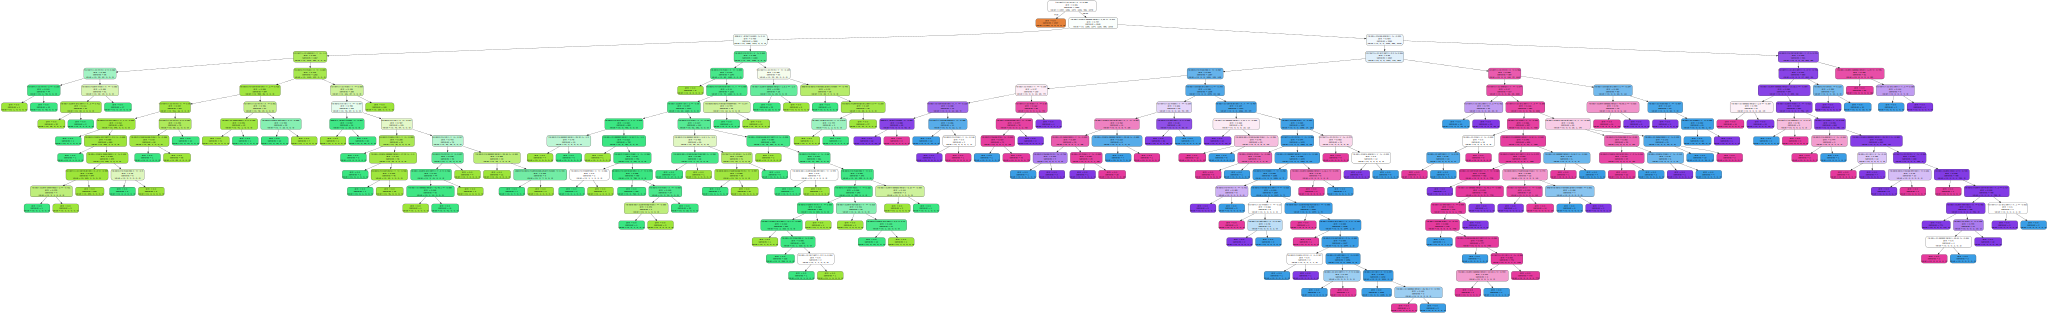

In [105]:
import graphviz
with open("human_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [70]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.52671299, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:
y_scores_tree = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring="accuracy")

In [95]:
y_scores_tree.mean()

0.5446137340048188

In [99]:
pamran_grid = [
    {'max_depth':[2,4,6,8,10], "max_features":["sqrt", None]}
]

grid_search = GridSearchCV(tree_clf, pamran_grid, cv=5, scoring="accuracy", n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=1,
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'max_features': ['sqrt', None]}],
             scoring='accuracy')

In [100]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'sqrt'}

In [101]:
grid_search.best_score_

0.8641272307699422

In [102]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='sqrt', random_state=42)

In [71]:
# 3. RandomForestClassifier: n_estimators, max_features, max_depth, 특성 중요도

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [108]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
y_scores_tree = cross_val_score(rnd_clf, X_train, y_train, cv=5, scoring="accuracy",n_jobs=1)

In [110]:
y_scores_tree.mean()

0.9171685696712404

In [111]:
pamran_grid = [
    {'max_depth':[2,4,6,8,10], "max_features":["sqrt", None]}
]

grid_search = GridSearchCV(rnd_clf, pamran_grid, cv=5, scoring="accuracy", n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'max_features': ['sqrt', None]}],
             scoring='accuracy')

In [112]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'sqrt'}

In [113]:
grid_search.best_score_

0.9241064202703516